# Proyecto 1 - Grupo 9

## Integrantes
* Carol Sofía Florido Castro - 202111430
* Juan Martin Vasquez Cristancho - 202113314 
* Natalia Villegas Calderon - 202113370


# Limpieza de datos

In [55]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, r2_score



In [56]:
# Cargar datos
file_path = 'fake_news_spanish.csv'
df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')


In [57]:
# Verificar la estructura del DataFrame
print("Información del DataFrame antes de la limpieza:")
display(df.info())
display(df.head())


Información del DataFrame antes de la limpieza:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57063 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           57063 non-null  object
 1   Label        57063 non-null  int64 
 2   Titulo       57047 non-null  object
 3   Descripcion  57063 non-null  object
 4   Fecha        57063 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


None

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,02/06/2023
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,01/10/2023
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,25/04/2022
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",03/01/2022
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",09/03/2018


In [58]:
# Verificar valores nulos
print("Valores nulos por columna antes de la limpieza:")
display(df.isnull().sum())

Valores nulos por columna antes de la limpieza:


ID              0
Label           0
Titulo         16
Descripcion     0
Fecha           0
dtype: int64

In [59]:

# Verificar duplicados
print(f"Filas duplicadas antes de la limpieza: {df.duplicated().sum()}")


Filas duplicadas antes de la limpieza: 445


In [60]:
# Verificar valores únicos en la columna 'Label'
print("Valores únicos en 'Label' antes de la limpieza:")
display(df['Label'].value_counts())


Valores únicos en 'Label' antes de la limpieza:


Label
1    33158
0    23905
Name: count, dtype: int64

In [61]:
# 1. Eliminación de filas duplicadas
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Eliminando {duplicates} filas duplicadas...")
    df.drop_duplicates(inplace=True)

Eliminando 445 filas duplicadas...


In [62]:
# 2. Manejo de valores nulos en columnas esenciales
df.dropna(subset=['Label', 'Titulo', 'Descripcion', 'Fecha'], inplace=True)


In [63]:
# 3. Normalización de columnas: eliminar espacios extra
df.columns = df.columns.str.strip()


In [64]:
# 4. Asegurar que la columna Label solo tenga valores 0 o 1
df['Label'] = pd.to_numeric(df['Label'], errors='coerce')
df = df[df['Label'].isin([0, 1])]

In [65]:
# 5. Convertir la columna Fecha a formato datetime, manejando distintos formatos posibles
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce')
    except:
        return np.nan

df['Fecha'] = df['Fecha'].apply(parse_date)
df.dropna(subset=['Fecha'], inplace=True)

In [66]:

# 6. Limpiar texto de columnas de texto (Titulo y Descripcion)
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ0-9.,;:\"\'\s]', '', text)  # Eliminar caracteres extraños
        text = re.sub(r'\s+', ' ', text).strip()  # Espacios extra
    return text

df['Titulo'] = df['Titulo'].apply(clean_text)
df['Descripcion'] = df['Descripcion'].apply(clean_text)


In [67]:
# 7. Verificación final de valores nulos
display(df.isnull().sum())

ID             0
Label          0
Titulo         0
Descripcion    0
Fecha          0
dtype: int64

In [68]:
# Mostrar información final del DataFrame
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 56602 entries, 0 to 57062
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           56602 non-null  object        
 1   Label        56602 non-null  int64         
 2   Titulo       56602 non-null  object        
 3   Descripcion  56602 non-null  object        
 4   Fecha        56602 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.6+ MB


None

,ID,Label,Titulo,Descripcion,Fecha
0,ID,1,'The Guardian' va con Sánchez: 'Europa necesit...,El diario británico publicó este pasado jueves...,2023-06-02
1,ID,0,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,REVELAN QUE EL GOBIERNO NEGOCIO LA LIBERACIÓN ...,2023-10-01
2,ID,1,El 'Ahora o nunca' de Joan Fuster sobre el est...,El valencianismo convoca en Castelló su fiesta...,2022-04-25
3,ID,1,"Iglesias alienta a Yolanda Díaz, ERC y EH Bild...","En política, igual que hay que negociar con lo...",2022-01-03
4,ID,0,Puigdemont: 'No sería ninguna tragedia una rep...,"En una entrevista en El Punt Avui, el líder de...",2018-03-09


## Exploracion de datos

C:\Users\57301\AppData\Local\Temp\ipykernel_26732\313128623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Label'], palette='RdPu')


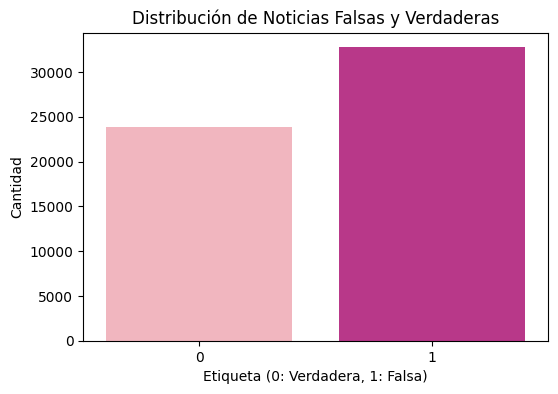

In [69]:
# Distribución de noticias falsas y verdaderas
plt.figure(figsize=(6,4))
sns.countplot(x=df['Label'], palette='RdPu')
plt.title('Distribución de Noticias Falsas y Verdaderas')
plt.xlabel('Etiqueta (0: Verdadera, 1: Falsa)')
plt.ylabel('Cantidad')
plt.show()

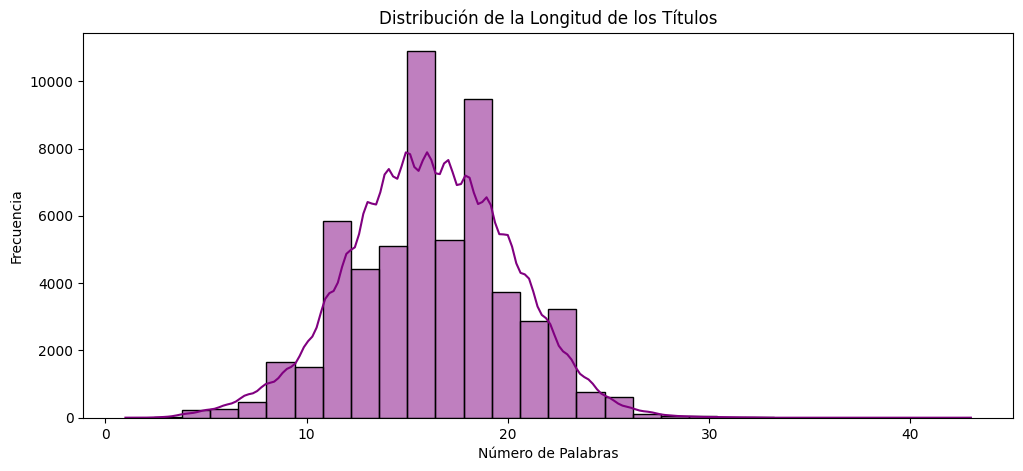

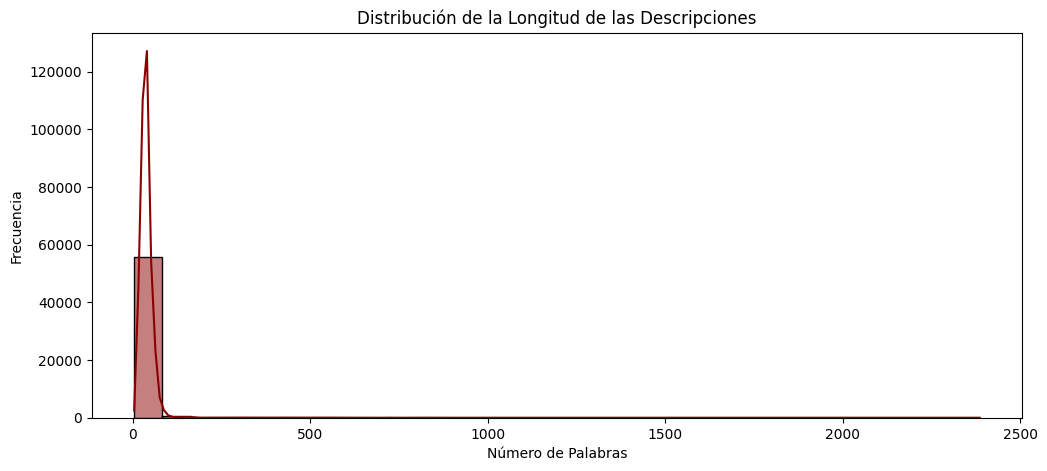

In [70]:
# Longitud del texto en títulos y descripciones
df['Titulo_Longitud'] = df['Titulo'].apply(lambda x: len(str(x).split()))
df['Descripcion_Longitud'] = df['Descripcion'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(12, 5))
sns.histplot(df['Titulo_Longitud'], bins=30, kde=True, color='purple')
plt.title('Distribución de la Longitud de los Títulos')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df['Descripcion_Longitud'], bins=30, kde=True, color='darkred')
plt.title('Distribución de la Longitud de las Descripciones')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()


C:\Users\57301\AppData\Local\Temp\ipykernel_26732\2791150674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Año'], palette='RdPu')


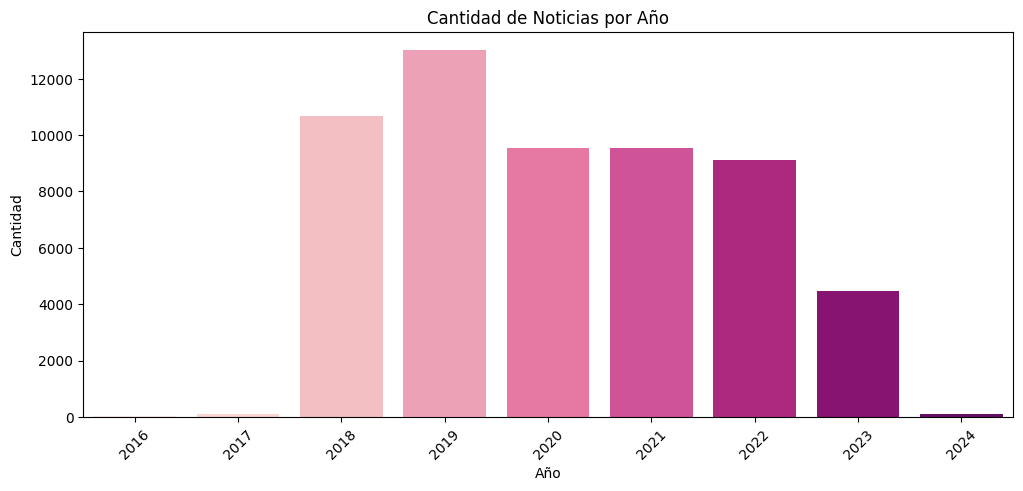

C:\Users\57301\AppData\Local\Temp\ipykernel_26732\2791150674.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Mes'], palette='RdPu')


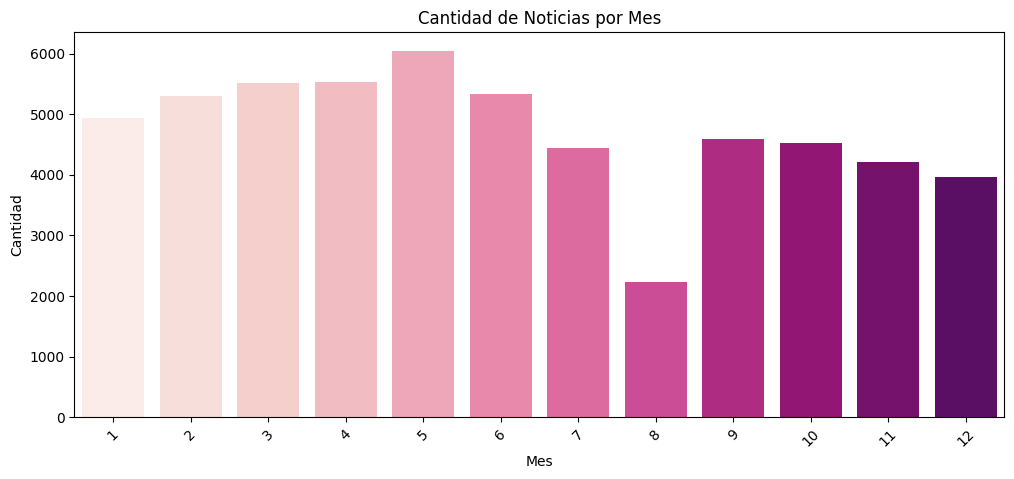

In [71]:
# Análisis de fechas
if pd.api.types.is_datetime64_any_dtype(df['Fecha']):
    df['Año'] = df['Fecha'].dt.year
    df['Mes'] = df['Fecha'].dt.month
    plt.figure(figsize=(12, 5))
    sns.countplot(x=df['Año'], palette='RdPu')
    plt.title('Cantidad de Noticias por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 5))
    sns.countplot(x=df['Mes'], palette='RdPu')
    plt.title('Cantidad de Noticias por Mes')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.show()


## Modelos de Clasificacion

## 1. Random Forest

In [72]:
# Vectorización de texto
# Vectorización de texto
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Titulo'] + ' ' + df['Descripcion'])
y = df['Label']


In [73]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [75]:
# Predicciones
y_pred = model.predict(X_test)



In [76]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)
roc_auc = roc_auc_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- MÉTRICAS DEL MODELO ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"R2 Score: {r2:.4f}")


--- MÉTRICAS DEL MODELO ---
Accuracy: 0.9132
Precision: 0.9024
Recall: 0.9530
F1 Score: 0.9270
F2 Score: 0.9424
ROC AUC Score: 0.9058
R2 Score: 0.6439


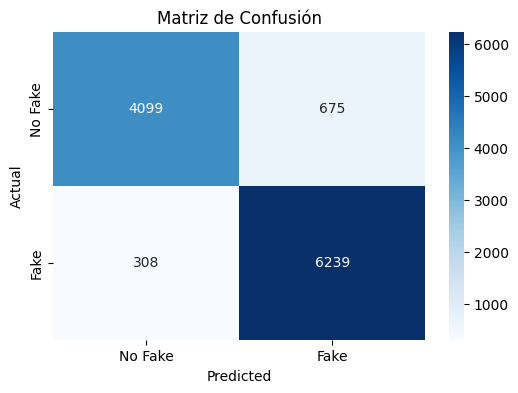

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, r2_score, confusion_matrix
import seaborn as sns
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fake', 'Fake'], yticklabels=['No Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()
